In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore",category=UserWarning)
# Outcome = 1 Diabet
# Outcome = 0 Healthy
data = pd.read_csv("diabetes.csv")
data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


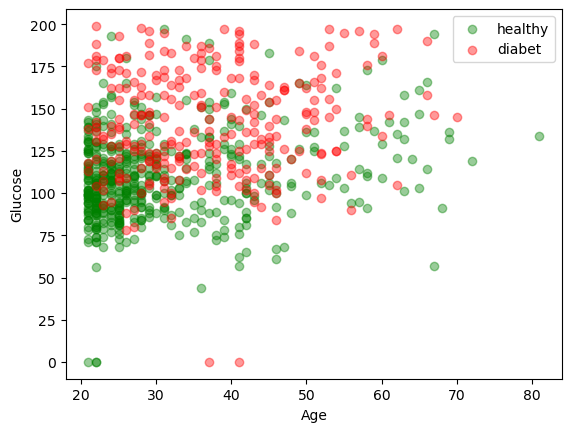

In [9]:


diabetes = data[data.Outcome == 1]
healthy_people = data[data.Outcome == 0]


# Let's make an example drawing just by looking at glourose for now:
# At the end of our program, our machine learning model will make a prediction by looking not only at glucose, but also at all other data..
plt.scatter(healthy_people.Age, healthy_people.Glucose, color="green", label="healthy", alpha = 0.4)
plt.scatter(diabetes.Age, diabetes.Glucose, color="red", label="diabet", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()


In [10]:


# let's determine the x and y axes
y = data.Outcome.values
x_raw_data = data.drop(["Outcome"],axis=1)
# We remove the outcome column(dependent variable) and leave only independent variables
# Because the KNN algorithm will group within x values..


# we are doing normalization - we are updating all of them so that the values in the x_ham_ Decal are only between 0 and 1
# If we do not normalize in this way, high numbers will crush small numbers and may mislead the KNN algorithm!
x = (x_raw_data - np.min(x_raw_data.values))/(np.max(x_raw_data.values)-np.min(x_raw_data.values))

# before
print("Raw data before normalization:\n")
print(x_raw_data.head().values)


# after 
print("\n\n\nThe data that we will provide to artificial intelligence for training after normalization:\n")
print(x.head())
    



Raw data before normalization:

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]



The data that we will provide to artificial intelligence for training after normalization:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.007092  0.174941       0.085106       0.041371  0.000000  0.039716   
1     0.001182  0.100473       0.078014       0.034279  0.000000  0.031442   
2     0.009456  0.216312       0.075650       0.000000  0.000000  0.027541   
3     0.001182  0.105201       0.078014       0.027187  0.111111  0.033215   
4     0.000000  0.161939       0.047281       0.041371  0

In [11]:

# we separate our test data with our train data
# our train data will be used to learn how the system distinguishes between a healthy person and a sick person
# if our test data is, let's see if our machine learning model can accurately distinguish between sick and healthy people
# it will be used for testing...
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=1)

# we are creating our knn model.
knn = KNeighborsClassifier(n_neighbors = 6) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("Verification test result of our test data for K=3 ", knn.score(x_test, y_test))


Verification test result of our test data for K=3  0.7532467532467533


In [12]:




# what should k be ?
# let's determine the best k value..
sayac = 1
for k in range(1,11):
    knn_yeni = KNeighborsClassifier(n_neighbors = k)
    knn_yeni.fit(x_train,y_train)
    print(sayac, "  ", "Accuracy rate: %", knn_yeni.score(x_test,y_test)*100)
    sayac += 1
    
    

1    Accuracy rate: % 79.22077922077922
2    Accuracy rate: % 74.02597402597402
3    Accuracy rate: % 77.92207792207793
4    Accuracy rate: % 74.02597402597402
5    Accuracy rate: % 72.72727272727273
6    Accuracy rate: % 75.32467532467533
7    Accuracy rate: % 74.02597402597402
8    Accuracy rate: % 76.62337662337663
9    Accuracy rate: % 76.62337662337663
10    Accuracy rate: % 76.62337662337663


In [13]:
# For a new patient forecast:
from sklearn.preprocessing import MinMaxScaler

# we are doing normalization - we used MinMax scaler to make normalization faster...
sc = MinMaxScaler()
sc.fit_transform(x_raw_data.values)
new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]
if new_prediction==1:
    print("Diabet")
else:
    print("Healthy")

Diabet
